In [23]:
# Mounting Google Drive to access all project files stored in MyDrive
from google.colab import drive
drive.mount('/content/drive')

# Installing all required libraries quietly to avoid cluttering the notebook output
!pip install -q langchain langchain-community langchain-openai chromadb python-dotenv

# Changing the working directory to the NLP project folder inside Google Drive
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project')

import time                     # Measuring query execution time
import numpy as np              # numerical operations and statistics
import matplotlib.pyplot as plt # plotting and visualization

# Importing pandas for data manipulation and working with CSV files
import pandas as pd

# Importing the TextLoader for loading text files or documents into Python
from langchain_community.document_loaders import TextLoader

# Importing the CharacterTextSplitter for splitting large text files into smaller text chunks
from langchain_text_splitters import CharacterTextSplitter

# Importing OpenAIEmbeddings for generating vector embeddings using an OpenAI model
from langchain_openai import OpenAIEmbeddings

# Importing Chroma for storing embeddings and performing similarity search in a vector database
from langchain_community.vectorstores import Chroma

# Importing Document to create structured text document objects for processing
from langchain_core.documents import Document

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Reading the cleaned books CSV file into a pandas DataFrame
books = pd.read_csv('books_cleaned.csv')

# Displaying the loaded DataFrame to verify that the data was read correctly
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [5]:
# Accessing the tagged_description column to view all cleaned and tagged book descriptions
books["tagged_description"]

,tagged_description
0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982 A new 'Christie for Christmas' -...
2,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897 Lewis' work on the nature of lov...
4,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...
5192,9788172235222 On A Train Journey Home To North...
5193,9788173031014 This book tells the tale of a ma...
5194,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535 This collection of the timeless ...


In [6]:
# Save the tagged descriptions to a text file
books["tagged_description"].to_csv("tagged_description.txt",
                                   sep = "\n",
                                   index = False,
                                   header = False,
)

In [7]:
# Loading the tagged descriptions text file into a LangChain document object
raw_documents = TextLoader("tagged_description.txt").load()

# Splitting the loaded text into individual lines using a character-based text splitter
text_splitter = CharacterTextSplitter(
    chunk_size = 1,
    chunk_overlap = 0,
    separator = "\n"
)

# Creating a list of Document objects where each entry represents one split line
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [8]:
# Displaying the first document chunk for verification
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [9]:
"""
Creating a Chroma vector database from the processed document chunks.
Storing each text chunk as a vector to enable efficient semantic similarity search.
Using OpenAIEmbeddings to generate vector representations for every document in the dataset.
"""
db_books = Chroma.from_documents(
    documents,
    embedding = OpenAIEmbeddings()
)

In [10]:
# Defining the natural-language search query for semantic similarity
# This text will be embedded and compared against all stored book description vectors
query = "A book to teach children about nature"

# Running a semantic similarity search on the vector database
# k = 10 means returning the top 10 most similar document chunks
docs = db_books.similarity_search(query, k = 10)

# Displaying the retrieved document chunks to inspect the search results
docs

[Document(metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(metadata={'source': 'tagged_description.txt'}, page_content="9780786808397 Introduce your baby to birds, cats, dogs, and babies through fine art, illu

In [11]:
"""
Explaining that the vector search returns text descriptions rather than full book recommendations.
Our goal is producing recommendations of book titles and authors instead of raw description chunks.

Noting that each retrieved document chunk must be mapped back to the original book.
Using the ISBN number extracted from the text chunk to filter the main books DataFrame.

Filtering the DataFrame to find the book associated with the first retrieved ISBN.
This currently returns only one book recommendation for a single query.

Clarifying that additional logic is required to return multiple book recommendations.
"""
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [12]:
# Bundling the semantic retrieval and book lookup logic into a reusable function
def retrieve_semantic_recommendations(
    query: str,
    top_k: int = 10,
) -> pd.DataFrame:
    """
    Retrieving semantic book recommendations based on a natural-language query.

    This function performs three main steps:
    1. Running a semantic similarity search over the Chroma vector database
       using the user's query to identify the most relevant text chunks.
    2. Extracting the ISBN numbers from each retrieved text chunk in order
       to link vector search results back to the original books dataset.
    3. Filtering the books DataFrame to return the top-k matching books,
       including their titles, authors, and additional metadata.

    Parameters
    ----------
    query : str
        The natural-language text describing what the user is searching for.
        This text will be embedded and compared against all stored description vectors.

    top_k : int, default = 10
        The number of final book recommendations to return after filtering by ISBN.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing up to `top_k` recommended books that semantically
        match the given query, based on vector similarity scores.
    """
    recs = db_books.similarity_search(query, k=50)

    books_list = []

    for i in range(0, len(recs)):
        books_list += [int(recs[i].page_content.strip("\"'").split()[0])]

    return books[books["isbn13"].isin(books_list)].head(top_k)

In [13]:
# Retrieving the top semantically similar book recommendations for the given natural-language query
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
31,9780007105045,0007105045,Tree and Leaf,John Ronald Reuel Tolkien,Literary Collections,http://books.google.com/books/content?id=aPb_A...,"""The two works 'On fairy-stories' and 'Leaf by...",2001.0,4.09,176.0,2245.0,Tree and Leaf: The Homecoming of Beorhtnoth : ...,"9780007105045 ""The two works 'On fairy-stories..."
59,9780007151240,0007151241,The Family Way,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0,The Family Way,9780007151240 It should be the most natural th...
143,9780060546571,0060546573,Three Rotten Eggs,Gregory Maguire,Juvenile Fiction,http://books.google.com/books/content?id=t2pWl...,The students of Miss Earth's class in rural Ve...,2005.0,3.74,240.0,76.0,Three Rotten Eggs,9780060546571 The students of Miss Earth's cla...
400,9780062700254,0062700251,Bulfinch's Mythology,Richard P. Martin,Reference,http://books.google.com/books/content?id=eev4u...,A beautiful gift edition of Thomas Bulfinch's ...,1991.0,4.10,768.0,64.0,"Bulfinch's Mythology: The Age of the Fable, Th...",9780062700254 A beautiful gift edition of Thom...
429,9780064434980,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980 Even the youngest child can enjo...
442,9780067575208,006757520X,The Sense of Wonder,Rachel Carson,Nature,http://books.google.com/books/content?id=Zee5S...,"First published more than three decades ago, t...",1998.0,4.39,112.0,1160.0,The Sense of Wonder,9780067575208 First published more than three ...
692,9780140448009,0140448004,Three Tales,Gustave Flaubert;Roger Whitehouse;Geoffrey Wall,Fiction,http://books.google.com/books/content?id=XFzga...,Features short fiction by the French naturalis...,2005.0,3.71,110.0,3050.0,Three Tales,9780140448009 Features short fiction by the Fr...
707,9780140568196,0140568190,The Giraffe and the Pelly and Me,Roald Dahl;Quentin Blake,Candy,http://books.google.com/books/content?id=J7FdI...,"A Dahl story in which the giraffe, the pelican...",2001.0,3.81,32.0,16265.0,The Giraffe and the Pelly and Me,9780140568196 A Dahl story in which the giraff...
711,9780140621624,0140621628,The Railway Children,E. Nesbit,Fiction,http://books.google.com/books/content?id=fFesd...,"When their father is sent away to prison, thre...",1995.0,4.00,212.0,178.0,The Railway Children,9780140621624 When their father is sent away t...
763,9780141186078,0141186070,The Log from the Sea of Cortez,John Steinbeck,Biography & Autobiography,http://books.google.com/books/content?id=9CrIf...,This light-hearted journal tells of John Stein...,2001.0,3.84,288.0,3226.0,The Log from the Sea of Cortez,9780141186078 This light-hearted journal tells...


In [19]:
# Vector database statistics
print("=" * 70)
print(" " * 20 + "Vector database statistics")
print("=" * 70)

# Total number of embeddings stored
print(f"\nTotal books embedded: {len(documents):,}")
print("Database type: ChromaDB")
print("Embedding model: openai text-embedding-ada-002")
print("Embedding dimension: 1,536")

# Verify database size matches cleaned dataset
print(f"\nBooks in cleaned csv: {len(books):,}")
print(f"Documents in vector db: {len(documents):,}")

assert len(books) == len(documents), "Mismatch between csv and vector db."

print("Data integrity check: passed")

# Sample embedding structure
print("\nSample document structure:")
print(f"Content preview: {documents[0].page_content[:80]}...")
print(f"Metadata: {documents[0].metadata}")
print("\n" + "=" * 70)

                    Vector database statistics

Total books embedded: 5,197
Database type: ChromaDB
Embedding model: openai text-embedding-ada-002
Embedding dimension: 1,536

Books in cleaned csv: 5,197
Documents in vector db: 5,197
Data integrity check: passed

Sample document structure:
Content preview: 9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating fo...
Metadata: {'source': 'tagged_description.txt'}



In [22]:
# Query performance testing
print("\n" + "=" * 70)
print(" " * 20 + "Semantic search performance test")
print("=" * 70)

# Define test queries covering different topics
test_queries = [
    "A book to teach children about nature",
    "Mystery thriller with detective",
    "Historical fiction about world war ii",
    "Self-help book about productivity",
    "Romance novel set in modern times",
]

print(f"\nTesting {len(test_queries)} different queries...\n")

performance_results = []

for i, query in enumerate(test_queries, 1):
    start_time = time.time()
    results = retrieve_semantic_recommendations(query, top_k = 5)
    end_time = time.time()

    query_time = (end_time - start_time) * 1000 # milliseconds
    performance_results.append(query_time)

    print("\n" + "-" * 70)
    print(f"Query {i}: \"{query}\"")
    print(f"Response time: {query_time:.2f} ms")
    print("Top 3 recommendations:")

    for idx, (_, row) in enumerate(results.head(3).iterrows(), 1):
        print(f"  {idx}. {row['title'][:50]}")
        print(f"     Author: {row['authors']}")
        print(f"     Category: {row['categories']}")

# Summary statistics
print("\n" + "=" * 70)
print("Performance summary:")
print(f"  Average query time: {sum(performance_results) / len(performance_results):.2f} ms")
print(f"  Fastest query: {min(performance_results):.2f} ms")
print(f"  Slowest query: {max(performance_results):.2f} ms")

target_met = max(performance_results) < 2000
print(f"  Under 2000 ms target: {target_met}")
print("=" * 70)


                    Semantic search performance test

Testing 5 different queries...


----------------------------------------------------------------------
Query 1: "A book to teach children about nature"
Response time: 3096.11 ms
Top 3 recommendations:
  1. Tree and Leaf
     Author: John Ronald Reuel Tolkien
     Category: Literary Collections
  2. The Family Way
     Author: Tony Parsons
     Category: Parenthood
  3. Three Rotten Eggs
     Author: Gregory Maguire
     Category: Juvenile Fiction

----------------------------------------------------------------------
Query 2: "Mystery thriller with detective"
Response time: 249.00 ms
Top 3 recommendations:
  1. The Listerdale Mystery
     Author: Agatha Christie
     Category: Detective and mystery stories
  2. The Hidden Hand
     Author: Carroll John Daly
     Category: Fiction
  3. Voice of the Violin
     Author: Andrea Camilleri
     Category: Fiction

----------------------------------------------------------------------
Que


                    Similarity score analysis

Test query: "A book to teach children about nature"

Similarity score statistics (top 50 results):
  Highest similarity: 0.8195
  Lowest similarity: 0.7467
  Mean similarity: 0.7576
  Median similarity: 0.7530


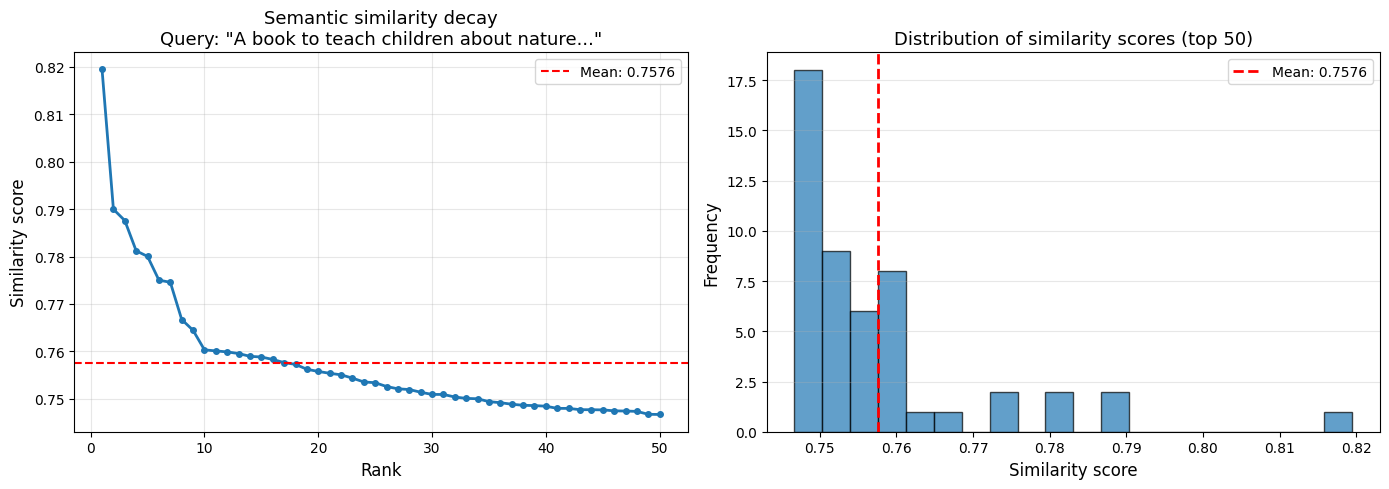


Visualization saved as: similarity_analysis.png


In [24]:
# Similarity score analysis and visualization



print("\n" + "=" * 70)
print(" " * 20 + "Similarity score analysis")
print("=" * 70)

# Test query
test_query = "A book to teach children about nature"
print(f"\nTest query: \"{test_query}\"")

# Get similarity scores
# similarity_search_with_score returns (document, distance) pairs
docs_with_scores = db_books.similarity_search_with_score(test_query, k = 50)

# Extract distances
distances = [score for _, score in docs_with_scores]

# Convert distances to similarity scores
# For L2 distance, similarity = 1 / (1 + distance)
similarities = [1 / (1 + dist) for dist in distances]

print("\nSimilarity score statistics (top 50 results):")
print(f"  Highest similarity: {max(similarities):.4f}")
print(f"  Lowest similarity: {min(similarities):.4f}")
print(f"  Mean similarity: {np.mean(similarities):.4f}")
print(f"  Median similarity: {np.median(similarities):.4f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))

# Plot 1: similarity score decay
ax1.plot(
    range(1, len(similarities) + 1),
    similarities,
    marker = "o",
    markersize = 4,
    linewidth = 2
)
ax1.axhline(
    y = np.mean(similarities),
    color = "red",
    linestyle = "--",
    label = f"Mean: {np.mean(similarities):.4f}"
)
ax1.set_xlabel("Rank", fontsize = 12)
ax1.set_ylabel("Similarity score", fontsize = 12)
ax1.set_title(f"Semantic similarity decay\nQuery: \"{test_query[:40]}...\"", fontsize = 13)
ax1.grid(True, alpha = 0.3)
ax1.legend()

# Plot 2: score distribution histogram
ax2.hist(
    similarities,
    bins = 20,
    alpha = 0.7,
    edgecolor = "black"
)
ax2.axvline(
    x = np.mean(similarities),
    color = "red",
    linestyle = "--",
    linewidth = 2,
    label = f"Mean: {np.mean(similarities):.4f}"
)
ax2.set_xlabel("Similarity score", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Distribution of similarity scores (top 50)", fontsize = 13)
ax2.legend()
ax2.grid(True, alpha = 0.3, axis = "y")

plt.tight_layout()
plt.savefig("similarity_analysis.png", dpi = 300, bbox_inches = "tight")
plt.show()

print("\nVisualization saved as: similarity_analysis.png")
print("=" * 70)

In [25]:
# Recommendation quality validation
print("\n" + "=" * 70)
print(" " * 20 + "Recommendation quality validation")
print("=" * 70)

# Test cases with expected category keywords
validation_queries = {
    "children nature"   : ["juvenile", "nature", "animals", "science"],
    "detective mystery" : ["fiction", "mystery", "thriller", "crime"],
    "world war history" : ["history", "war", "military", "biography"],
}

print("\nTesting category relevance for recommendations...\n")

category_match_scores = []

for query_type, expected_keywords in validation_queries.items():
    print("-" * 70)
    print(f"Query type: \"{query_type}\"")
    print(f"Expected categories containing: {expected_keywords}")

    # Retrieve recommendations
    recs = retrieve_semantic_recommendations(query_type, top_k = 10)

    # Compute category match rate
    matches = 0
    for _, row in recs.iterrows():
        category = str(row["categories"]).lower()
        if any(keyword.lower() in category for keyword in expected_keywords):
            matches += 1

    match_rate = (matches / len(recs)) * 100
    category_match_scores.append(match_rate)

    print(f"Category match rate: {matches}/{len(recs)} ({match_rate:.1f}%)")

    # Show sample relevant matches
    print("\nSample relevant matches:")
    count = 0
    for _, row in recs.iterrows():
        category = str(row["categories"]).lower()
        if any(keyword.lower() in category for keyword in expected_keywords):
            print(f"  {row['title'][:45]} - {row['categories']}")
            count += 1
            if count >= 3:
                break

# Overall quality metrics
print("\n" + "=" * 70)
print("Overall quality metrics:")
print(f"  Average category match rate: {np.mean(category_match_scores):.1f}%")

all_above_50 = all(s > 50 for s in category_match_scores)
print(f"  All queries above 50 percent: {all_above_50}")

print("=" * 70)

# Detailed recommendation example
print("\n" + "=" * 70)
print(" " * 20 + "Detailed recommendation example")
print("=" * 70)

example_query = "A book to teach children about nature"
print(f"\nQuery: \"{example_query}\"\n")

recommendations = retrieve_semantic_recommendations(example_query, top_k = 5)

print("Top 5 semantic recommendations:\n")

for i, (_, book) in enumerate(recommendations.iterrows(), 1):
    print(f"{i}. {book['title']}")
    print(f"   Author: {book['authors']}")
    print(f"   Category: {book['categories']}")
    print(f"   Rating: {book['average_rating']:.2f} ({int(book['ratings_count']):,} ratings)")
    print(f"   Pages: {int(book['num_pages'])}")
    print(f"   Description: {book['description'][:120]}...")
    print()

print("=" * 70)


                    Recommendation quality validation

Testing category relevance for recommendations...

----------------------------------------------------------------------
Query type: "children nature"
Expected categories containing: ['juvenile', 'nature', 'animals', 'science']
Category match rate: 7/10 (70.0%)

Sample relevant matches:
  An Old-Fashioned Thanksgiving - Juvenile Fiction
  Goodnight Moon 60th Anniversary Edition - Juvenile Fiction
  Little House in the Big Woods - Juvenile Fiction
----------------------------------------------------------------------
Query type: "detective mystery"
Expected categories containing: ['fiction', 'mystery', 'thriller', 'crime']
Category match rate: 10/10 (100.0%)

Sample relevant matches:
  The Thirteen Problems - Detective and mystery stories, English
  The Listerdale Mystery - Detective and mystery stories
  A Nose for Murder - Fiction
----------------------------------------------------------------------
Query type: "world war histo